### ML_group_4
* Aleksander Augustyniak
* Adrian Eidsnes Phillips

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# lists the files in the folder
import os
print(os.listdir("./data"))

['forest_model.pkl', 'linear_model.pkl', 'sample_submission.csv', 'test.csv', 'train.csv', 'tree_model.pkl']


In [3]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sampleSubmission = pd.read_csv("./data/sample_submission.csv")

# 1. Frame the problem and look at the big picture

Framing the problem should consist of getting the basic idea: what's my role in the project. This stage requires to think about what model should be used and generally what should it be used for, also how much time is required to spend to tune the model.

The *California Housing* data set looks like a regression task rather than a classifying, because the goal is to predict some value. The data set is not changing in time, so the best approach is to train the future model as if it was an offline/batch learning. 

When it comes to regression tasks, the best performance measurement is provided by RMSE – Root Mean Squared Error. The bigger error, the worse performance it gives. That performance measure is highly effective because of its ability to detect outliers is incredible.

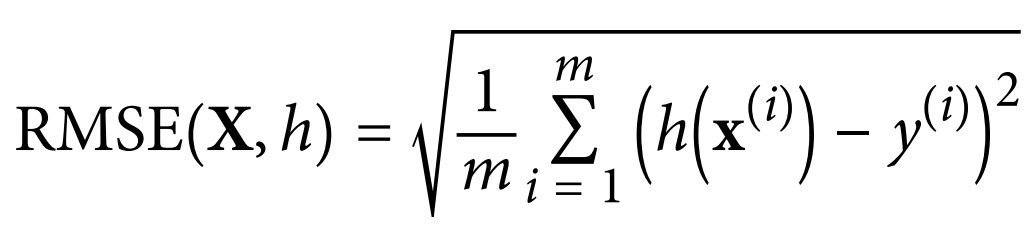

m – number of instances in a dataset\
$\mathbf{x}^{(i)}$ – vector of all instance's features, where $(i)$ – $i$*th* instance of a dataset\
$y^{(i)}$ – output value matching its $i$*th* instance\
$\mathbf{X}$ – matrix with all the features without labels\
$h(\mathbf{x}^{(i)})$ (*hypothesis*) – system's prediction function; it's output value is a prediction of the given vector $\mathbf{x}^{(i)}$

# 2. Get the data

The dataset is a .csv file – comma-separated values. It is available in *sklearn.datasets.fetch_california_housing*.

# 3. Explore the data to gain insights

The environment being used for the assignment is Python, including couple of libraries, such as: NumPy, Pandas, Matplotlib, Scikit-Learn.

There are few methods, which using helps to have more understandment of the dataset.

In [4]:
# head method – shows first 5 rows od dataframe
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [5]:
# info method – shows data types of each column's values, number of rows and columns, and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [6]:
# describe method – shows some statistical measures of values of each column in dataframe like: count, mean, standard deviation
# and quantiles
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


It's clearly visible that there is a lack of some values (total_bedrooms).

The *California Housing* data set consists of few columns with numerical values and one column which values are non-numerical. Rows (*instances*) represents each district and columns (*features*) represents the values describing instances (in this case districts).

To be able to see more clearly how values of different instances reacts within a feature, we can use *hist* method. 

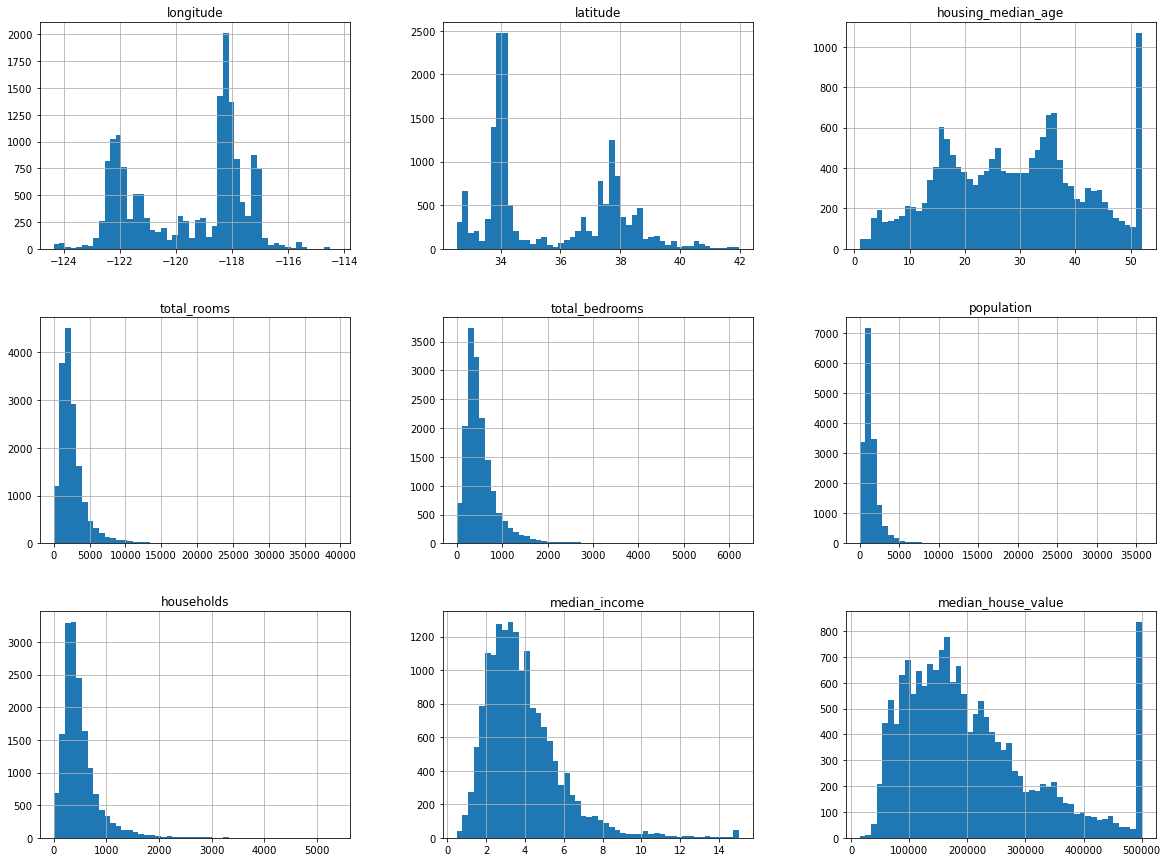

In [7]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

We can see that there is something odd going on in some of the histograms, *housing_median_age* shows that houses older than 50 years are being plotted into one value and also *median_house_value* has such of a problem. It is treated as an issue and there should be done something about it to make the model efficient.

## Splitting data into two subsets

The data set is already splitted into two subsets: *training* and *test* one.

If we had a whole data set in one file, we could run these methods: 

In [8]:
# # other 20% = test set
# test_subset = train.iloc[int(len(train)*0.8):]

# # first 80% = training set
# train = train.iloc[:int(len(train)*0.8)]

## Visualizing the data

VIsualizing the data helps getting even more understanding of the data.

One of the methods is to represent the data on the **scatter plot**, which could be crucial, if the price would be strongly dependent on the house location. This kind of visualizing data should not be omitted.

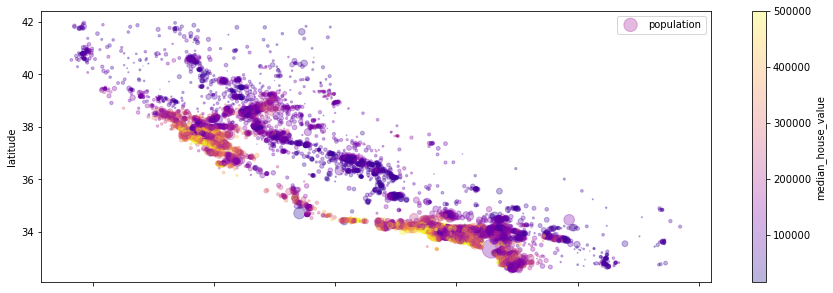

In [9]:
train.plot(kind="scatter", x="longitude", y="latitude", s=train["population"]/100,
           label="population", alpha=0.3, figsize=(15,5), c="median_house_value", cmap=plt.get_cmap("plasma"))
plt.legend()

Colors in the plot represents a level of population in the certain areas.\
Purple color stands for least populated areas and orange, yellow stands for most populated ones.

Another way to have a better insight of what is in the data set exactly is to create **correlation plots** or **correlation matrices**.

In [10]:
corr_matrix = train.corr()

# looking for correlation between median_house_value and other values
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>]],
      dtype=object)

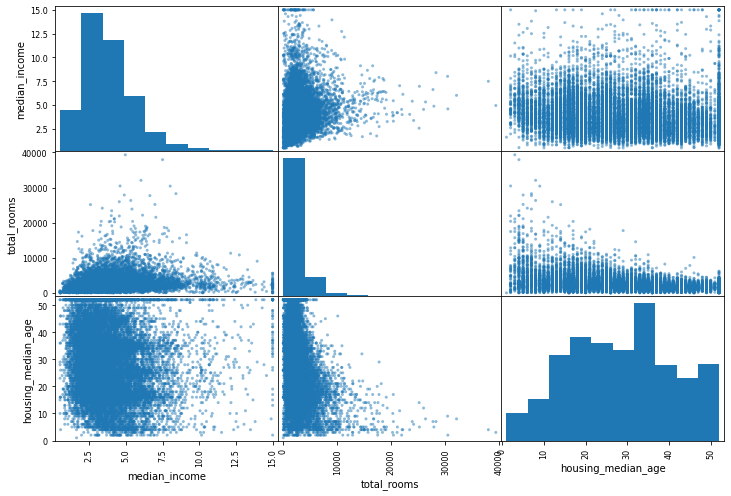

In [11]:
from pandas.plotting import scatter_matrix
attributes = [ "median_income",
              "total_rooms", "housing_median_age"]
scatter_matrix(train[attributes], figsize=(12, 8))

The main diagonal line in the plot represents correlation of features to its own values, so it is not that important. More valuable plots are these, whose values approximations resemble linear functions (e.g. *median_house_value*, *median_income*) or have some pattern.

# 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms

$$\huge{z=\frac{(x-\mu)}{\sigma}}$$ \
$x$ — independent value (data value)\
$\mu$ — mean\
$\sigma$ — standard deviation\
$z$ — score of a data value\

When a z-score value is lower than 3, we remove such an instance from the data set.

In [12]:
train_labels = train["median_house_value"].copy()
train = train.drop("median_house_value", axis=1)

The earlier lack of some values in *total_bedrooms* feature could be fixed with the help of *SimpleImputer* – the *sklearn*'s class for handling that kind of issues.

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

The *imputer* object will fill all the missing values with their proper median.

## Getting rid of non-numerical and missing values

The next important step is to properly handle non-numerical, object values. Our data set has one. We will define another dataframe, which is copy of *train* dataframe and drop column which has non-numerical values.

In [14]:
train_numerical = train.drop("ocean_proximity", axis=1)
train_numerical.shape

(16512, 8)

*Feeding* the imputer instance to compute the median value of each feature.

In [15]:
imputer.fit(train_numerical)

SimpleImputer(strategy='median')

Looking at the values.

In [16]:
imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [17]:
train_numerical.median().values

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

Replacing missing values.

In [18]:
train_transformed = pd.DataFrame(imputer.transform(train_numerical),
                       columns=train_numerical.columns)

## Handling categorical values

To handle categorical values, we use *OrdinalEncoder* class instance, which maps a category into some numerical value.

In [19]:
#train_categories
train_categories = train[["ocean_proximity"]]

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [21]:
ordinal_encoder.fit_transform(train_categories)
# train_categories_encoded = ordinal_encoder.fit_transform(train_categories)

array([[3.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [22]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The next step is to use *OneHotEncoder* to create one binary attribute per category. It results in creating a matrix, which width is equal to the number of categories and height is equal to the number of dataset's instances. Each instance will have a category feature represented by a vector, where the value *one* represents actual encoded category.

In [23]:
from sklearn.preprocessing import OneHotEncoder
categories_encoder = OneHotEncoder()
train_categories_1hot = categories_encoder.fit_transform(train_categories)
train_categories_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Creating custom transformers

We will write a custom class, which allows including some optional hyperparameter or few. In this case the class will have a hyperparameter *add_bedrooms_per_room*. 

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, Y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                    bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
train_extra = attr_adder.transform(train.values)

## Creating transformation pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])
train_numerical_transformed = num_pipeline.fit_transform(train_numerical)

1. Filling missing values by a median value
2. Adding more features to the set using already prepared data
3. Standardizing the values using z-score technique (StandardScaler)

$$\huge{z=\frac{(x-\mu)}{\sigma}}$$ \
$x$ — independent value (data value)\
$\mu$ — mean\
$\sigma$ — standard deviation\
$z$ — score of a data value\

If a z-score value is lower than some treshold (usually 2/3), we remove such an instance from the data set.

## Creating a pipeline for both numerical and categorical values

In [26]:
from sklearn.compose import ColumnTransformer

# getting lists of attributes of two sets (numerical and categorical)
numerical_attributes = list(train_numerical)
categories_attributes = ["ocean_proximity"]

# creating a final pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_attributes),
    ("cat", OneHotEncoder(), categories_attributes)
])

# using the pipeline to prepare the data set
train_prepared = full_pipeline.fit_transform(train)

# 5. Explore many different models and short-list the best ones

There are few regression models: *LinearRegression*, *DecisionTreeRegressor*, *RandomForestRegressor*...

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

___
...and some tools to test their efficiency (also called *score*): Solving *RMSE* equation (already mentioned), splitting data into *k*-folds.

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [29]:
# linear regression model – training
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [30]:
# linear regression model – measurement
lin_reg_predictions = lin_reg.predict(train_prepared)
lin_rmse = np.sqrt(mean_squared_error(train_labels, lin_reg_predictions))
lin_rmse

69171.45965701179

There is a tendency to overfit the provided data. We are using another model.
___

In [31]:
# tree regression model – training
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor()

In [32]:
# tree regression model – measurement
tree_reg_predictions = tree_reg.predict(train_prepared)
tree_rmse = np.sqrt(mean_squared_error(train_labels, tree_reg_predictions))
tree_rmse

0.0

This model is overfitting the data. We are trying with another model and methodology.
___

To be completely sure, we will use cross valuation scores method. We will run couple of machine model predictions and count a mean and standard deviation from these series using simple function.

In [33]:
def cv_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [34]:
# cross valuation scores
tree_scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [35]:
# scores for tree regression model
cv_scores(tree_rmse_scores)

Scores: [71400.8783361  71395.62703337 72706.99567885 68010.3925283
 72566.01478679 69037.92273505 72490.18590468 70400.5183413
 71643.27405066 71272.26901725]
Mean: 71092.40784123485
Standard deviation: 1464.702457799991


In [36]:
# scores for linear regression model using cross valuation method
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
cv_scores(lin_rmse_scores)

Scores: [71621.20534399 66808.00663802 74375.22611867 66735.6383205
 70141.41828835 69564.89139125 66531.35458565 67063.99073657
 73594.1631595  67458.06998553]
Mean: 69389.39645680184
Standard deviation: 2812.9665717790917


In [37]:
# scores for random forest regression model
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor()

In [38]:
# valuating a forest regression model
forest_scores = cross_val_score(forest_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=2)

forest_rmse_scores = np.sqrt(-forest_scores)
cv_scores(forest_rmse_scores)

Scores: [51758.20576046 52079.91670983]
Mean: 51919.0612351428
Standard deviation: 160.85547468327786


## Saving models into files

In [54]:
import joblib

# linear regression model
joblib.dump(lin_reg, "./data/linear_model.pkl")

# tree regression model
joblib.dump(tree_reg, "./data/tree_model.pkl")

# random forest regression model
joblib.dump(forest_reg, "./data/forest_model.pkl")

['./data/forest_model.pkl']

In [42]:
import joblib

lin_reg = joblib.load("./data/linear_model.pkl")

tree_reg = joblib.load("./data/tree_model.pkl")

forest_reg = joblib.load("./data/forest_model.pkl")

# 6. Fine-tune your models and combine them into a great solution

We use GridSearchCV to look for the best permutation of numbers of estimators and features. The class chooses the best model and lets us to use it to predict the output on a *test* set.

In [50]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {"n_estimators": [3, 10, 30 50], "max_features": [2, 4, 6, 10, 13]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, params_grid, cv = 5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(train_prepared, train_labels)

grid_search.best_params_

{'max_features': 13, 'n_estimators': 50}

In [51]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = numerical_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.46972508809665287, 'median_income'),
 (0.14155433582708896, '<1H OCEAN'),
 (0.12124177046321005, 'pop_per_hhold'),
 (0.06348334323582332, 'longitude'),
 (0.06120295264605203, 'latitude'),
 (0.04531980991093687, 'housing_median_age'),
 (0.03698907190742887, 'rooms_per_hhold'),
 (0.014902215211219656, 'total_rooms'),
 (0.014332593098561415, 'total_bedrooms'),
 (0.01350185616158705, 'population'),
 (0.012557591302781326, 'households'),
 (0.0023106488261834973, 'NEAR BAY'),
 (0.0018006380695877247, 'bedrooms_per_room'),
 (0.0007763721700465093, 'ISLAND'),
 (0.0003017130728397858, 'INLAND')]

In [52]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50540.622463375614 {'max_features': 13, 'n_estimators': 50}
60615.15476366271 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53843.17686001406 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59215.84200298718 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51881.74156293298 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57899.620226851584 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51478.28181719712 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


# 7. Present your solution

In [53]:
final_model = grid_search.best_estimator_

X_test = test
X_test = X_test.drop("Id", axis=1)

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_data = pd.DataFrame({"Id": test["Id"], "median_house_value": final_predictions})
final_data.to_csv("./data/competition_predictions.csv", index=False)

# 8. Launch, monitor and maintain your system